**Mujeres y países anfitriones en Juegos Olímpicos de Invierno: ¿Aumentan su presencia? ¿Ganan más medallas?**

Declaraciones de librerías.

In [1]:
import numpy as np  # muy útil para cálculos científicos con Python
import pandas as pd # Librería para estructar datos primarios

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import matplotlib.lines as mlines

Lectura de los datos.

In [2]:
athletes = pd.read_csv("athlete_events_dataset.csv") #pd.read_csv("athlete_events_dataset.csv")
regions = pd.read_csv("country_definitions.csv")     #pd.read_csv("noc_regions.csv") 
medal_2018 = pd.read_csv("pyeongchang_medal_2018.csv")

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Union de los dataframes.

In [3]:
df_athletes = athletes.merge(regions, how='left', on='NOC')
df_athletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


Renombrado de las columnas.

In [4]:
df_athletes.rename(columns={'region':'Country','notes':'Notes'}, inplace=True)
df_athletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


Busqueda de valores nulos

In [5]:
missing_data = df_athletes.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ID
False    271116
Name: ID, dtype: int64

Name
False    271116
Name: Name, dtype: int64

Sex
False    271116
Name: Sex, dtype: int64

Age
False    261642
True       9474
Name: Age, dtype: int64

Height
False    210945
True      60171
Name: Height, dtype: int64

Weight
False    208241
True      62875
Name: Weight, dtype: int64

Team
False    271116
Name: Team, dtype: int64

NOC
False    271116
Name: NOC, dtype: int64

Games
False    271116
Name: Games, dtype: int64

Year
False    271116
Name: Year, dtype: int64

Season
False    271116
Name: Season, dtype: int64

City
False    271116
Name: City, dtype: int64

Sport
False    271116
Name: Sport, dtype: int64

Event
False    271116
Name: Event, dtype: int64

Medal
True     231333
False     39783
Name: Medal, dtype: int64

Country
False    271114
True          2
Name: Country, dtype: int64

Notes
True     266077
False      5039
Name: Notes, dtype: int64



Con base en el resumen de arriba, cada columna tiene 27116 filas de datos, cinco columnas contienen información faltante:

<ol>
    <li>"Age": 9474 datos faltantes</li>
    <li>"Height": 60171 datos faltantes</li>
    <li>"Weight": 62875 datos faltantes</li>
    <li>"Country" : 2 datos faltantes</li>
    <li>"Notes": 5039 datos faltantes</li>
</ol>

Los datos faltantes de Edad, Peso y Altura, se sustituirán por la media de los mismos. Por su parte hay que revisar los datos de Country y Notes para determinar si amerita una sustitución.

In [6]:
avg_age_loss = df_athletes["Age"].astype("float").mean(axis=0)
print("Average of Age:", avg_age_loss)

df_athletes["Age"].replace(np.nan, avg_age_loss, inplace=True)

Average of Age: 25.556898357297374


In [7]:
avg_height_loss = df_athletes["Height"].astype("float").mean(axis=0)
print("Average of Height:", avg_height_loss)

df_athletes["Height"].replace(np.nan, avg_height_loss, inplace=True)

Average of Height: 175.33896987366376


In [8]:
avg_weight_loss = df_athletes["Weight"].astype("float").mean(axis=0)
print("Average of Weight:", avg_weight_loss)

df_athletes["Weight"].replace(np.nan, avg_weight_loss, inplace=True)

Average of Weight: 70.70239290053351


Atletas en los Juegos de Invierno.

In [9]:
df_winter = df_athletes[athletes['Season']=='Winter']
df_winter.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


Atletas en los Juegos de Verano.

In [10]:
df_summer = df_athletes[athletes['Season']=='Summer']
df_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


Luego de la separación de los dataframes, se depura los atletas que no ganaron medallas en WOG y SOG.

In [11]:
athletesSummer = df_summer.dropna(subset=['Medal'])
athletesSummer.columns[athletesSummer.nunique() <= 1]

Index(['Season'], dtype='object')

In [12]:
athletesWinter = df_winter.dropna(subset=['Medal'])
athletesWinter.columns[athletesWinter.nunique() <= 1]

Index(['Season', 'Notes'], dtype='object')

Ahora, se procederá a eliminar las medallas duplicadas. Esto aplica principalmente en los deportes de conjunto (Como Hockey sobre Hielo) ya que las medallas se otorgan al país ganador mientras que en el dataset, cada jugador de Hockey (siguiendo con el ejemplo) suma medalla y, a la larga, aumenta artificialmente la cantidad de preseas ganadas en los WOG y SOG.

In [13]:
pd.get_dummies(athletesSummer['Medal'])
pd.get_dummies(athletesWinter['Medal'])

athletesSummer.duplicated().sum()
athletesWinter.duplicated().sum()

athletesSummer.drop_duplicates(inplace=True)
athletesWinter.drop_duplicates(inplace=True)

pd.get_dummies(athletesSummer['Medal'])
pd.get_dummies(athletesWinter['Medal'])

,Bronze,Gold,Silver
40,1,0,0
60,0,1,0
61,1,0,0
63,0,0,1
64,1,0,0
...,...,...,...
270641,0,1,0
270827,0,0,1
270876,0,1,0
270878,1,0,0


In [14]:
summer = pd.concat([athletesSummer,pd.get_dummies(athletesSummer['Medal'])],axis=1)
#winter.head(2)
winter = pd.concat([athletesWinter,pd.get_dummies(athletesWinter['Medal'])],axis=1)
#summer.head(2)

Dataframe con los atletas que ganaron medalla en invierno y verano.

In [15]:
countMedal_winter = winter.drop_duplicates(subset=['Team','NOC','Country','Games','Year','City','Sport','Event','Medal'])
countMedal_winter.head(2)

countMedal_summer = summer.drop_duplicates(subset=['Team','NOC','Country','Games','Year','City','Sport','Event','Medal'])
countMedal_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
37,15,Arvo Ossian Aaltonen,M,30.0,175.33897,70.702393,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0


Analisis rendimiento de países anfitriones a lo largo de TODAS las ediciones de los JJOO de invierno

In [16]:
winter_city = countMedal_winter.copy()
def host_country(col):
    if col == "Chamonix" or col == "Grenoble" or col == "Albertville":
        return "France"  #"FRA"
    elif col == "Sankt Moritz":
        return "Switzerland"  #"SUI"
    elif col == "Lake Placid" or col == "Salt Lake City" or col == "Squaw Valley":
        return  "United States of America"
    elif col == "Garmisch-Partenkirchen":
        return  "Germany"  #"GER"
    elif col == "Oslo" or col == "Lillehammer":
        return  "Norway"   #"NOR"
    elif col == "Innsbruck":
        return  "Austria"  #"AUT"
    elif col == "Sapporo" or col == "Nagano":
        return  "Japan"  #"JPN"
    elif col == "Sarajevo":
        return  "Serbia"  #"YUG"
    elif col == "Calgary" or col == "Vancouver":
        return  "Canada"  #"CAN"
    elif col == "Cortina d'Ampezzo" or col == "Torino":
        return  "Italy"   #"ITA"
    elif col == "Sochi":
        return  "Russia"  #"RUS"
    elif col == "Pyeongchang":
        return  "South Korea"  #"KOR"
    else:
        return "Other"


# Applying this function

winter_city['Host_Country'] = winter_city['City'].apply(host_country)

In [17]:
df_new = winter_city.groupby(['Year','Host_Country','Country','Sex'])['Sex'].count().unstack().fillna(0).astype(int).reset_index()

df_new['Is_Host'] = np.where(df_new['Host_Country'] == df_new['Country'],1,0)
df_new['Total'] = df_new['M'] + df_new['F']
#df_new.tail(25)

In [18]:
sample = df_new.groupby(['Country','Is_Host'])['Total'].mean().unstack().dropna()
sample = sample.rename(columns={0 : "Not Hosting", 1 : "Hosting"})
sample = sample.reset_index().query("Country == 'Russia' | Country == 'Canada' | Country == 'Italy' | Country == 'United States of America' | Country == 'Japan' | Country == 'Norway' | Country == 'France' | Country == 'Switzerland' | Country == 'Serbia' | Country == 'Austria' | Country == 'Germany'").set_index('Country')
sample

Is_Host,Not Hosting,Hosting
Country,,
Austria,10.000000,9.0
Canada,6.950000,15.5
France,4.888889,7.0
Germany,19.526316,6.0
Italy,6.250000,7.0
Japan,3.200000,6.5
Norway,14.000000,19.5
Russia,20.400000,33.0
Serbia,3.000000,1.0


Medallistas femeninas en las últimas 5 ediciones de JJOO, enfocado en los países anfitriones.

In [19]:
temp = winter_city.query("Year >= 1994")
temp['Year'].unique()

df_new_medal = temp.groupby(['Year','Host_Country','Country','Sex'])['Sex'].size().unstack().fillna(0).astype(int).reset_index()

df_new_medal['Is_Host'] = np.where(df_new_medal['Host_Country'] == df_new_medal['Country'],1,0)
df_new_medal['Total'] = df_new_medal['M'] + df_new_medal['F']
df_new_medal.tail(25)

Sex,Year,Host_Country,Country,F,M,Is_Host,Total
123,2014,Russia,Austria,8,9,0,17
124,2014,Russia,Belarus,5,1,0,6
125,2014,Russia,Canada,11,14,0,25
126,2014,Russia,China,5,4,0,9
127,2014,Russia,Croatia,0,1,0,1
128,2014,Russia,Czech Republic,4,4,0,8
129,2014,Russia,Finland,3,2,0,5
130,2014,Russia,France,3,12,0,15
131,2014,Russia,Germany,10,9,0,19
132,2014,Russia,Great Britain,3,1,0,4


In [20]:
sample_medal = df_new_medal.groupby(['Country','Is_Host'])['F'].mean().unstack().dropna()
sample_medal = sample_medal.rename(columns={0 : "Not Hosting", 1 : "Hosting"})
sample_medal = sample_medal.reset_index().query("Country == 'Russia' | Country == 'Canada' | Country == 'Italy' | Country == 'United States of America' | Country == 'Japan'").set_index('Country')
sample_medal

Is_Host,Not Hosting,Hosting
Country,,
Canada,9.8,14.0
Italy,5.6,3.0
Japan,1.4,2.0
Russia,9.8,10.0
United States of America,10.4,11.0


Participación femenina en las últimas 5 ediciones de Juegos Olímpicos de Invierno, enfocado en los países anfitriones.

In [21]:
hola = df_winter.drop_duplicates(subset=['Name', 'Year'], keep='last')

#Atletas femeninas en JJOO Invierno
womenOlympics = hola[(hola.Sex=='F') & (hola.Season=='Winter')]

#Dataset medallistas femeninas
womenMedal = winter[(winter.Sex=='F')] #womenMedal = countMedal_winter[(countMedal_winter.Sex=='F')]

#Atletas masculinos en JJOO Invierno
menOlympics = hola[(hola.Sex=='M') & (hola.Season=='Winter')]

#Dataset medallistas masculinos
menMedal = winter[(winter.Sex=='M')] #menMedal = countMedal_winter[(countMedal_winter.Sex=='M')]

In [22]:
winter_city_w = hola.copy()
def host_country_w(col):
    if col == "Chamonix" or col == "Grenoble" or col == "Albertville":
        return "France"  #"FRA"
    elif col == "Sankt Moritz":
        return "Switzerland"  #"SUI"
    elif col == "Lake Placid" or col == "Squaw Valley" or col == "Salt Lake City":
        return  "United States of America"
    elif col == "Garmisch-Partenkirchen":
        return  "Germany"  #"GER"
    elif col == "Oslo" or col == "Lillehammer":
        return  "Norway"   #"NOR"
    elif col == "Innsbruck":
        return  "Austria"  #"AUT"
    elif col == "Sapporo" or col == "Nagano":
        return  "Japan"  #"JPN"
    elif col == "Sarajevo":
        return  "Serbia"  #"YUG"
    elif col == "Calgary" or col == "Vancouver":
        return  "Canada"  #"CAN"
    elif col == "Cortina d'Ampezzo" or col == "Torino":
        return  "Italy"   #"ITA"
    elif col == "Sochi":
        return  "Russia"  #"RUS"
    elif col == "Pyeongchang":
        return  "South Korea"  #"KOR"
    else:
        return "Other"


# Applying this function

winter_city_w['Host_Country'] = winter_city_w['City'].apply(host_country_w)

In [23]:
temp_w = winter_city_w.query("Year >= 1998")
temp_w['Year'].unique()

df_new_w = temp_w.groupby(['Year','Host_Country','Country','Sex'])['Sex'].size().unstack().fillna(0).astype(int).reset_index()

df_new_w['Is_Host'] = np.where(df_new_w['Host_Country'] == df_new_w['Country'],1,0)
df_new_w['Total'] = df_new_w['M'] + df_new_w['F']
df_new_w.head(25)

Sex,Year,Host_Country,Country,F,M,Is_Host,Total
0,1998,Japan,Andorra,1,2,0,3
1,1998,Japan,Argentina,1,1,0,2
2,1998,Japan,Armenia,3,4,0,7
3,1998,Japan,Australia,8,15,0,23
4,1998,Japan,Austria,23,73,0,96
5,1998,Japan,Azerbaijan,2,2,0,4
6,1998,Japan,Belarus,15,44,0,59
7,1998,Japan,Belgium,0,1,0,1
8,1998,Japan,Bermuda,0,1,0,1
9,1998,Japan,Bosnia and Herzegovina,1,7,0,8


In [24]:
sample_w = df_new_w.groupby(['Country','Is_Host'])['F'].mean().unstack().dropna()
sample_w = sample_w.rename(columns={0 : "Not Hosting", 1 : "Hosting"})
sample_w = sample_w.reset_index().query("Country == 'Russia' | Country == 'Canada' | Country == 'Italy' | Country == 'United States of America' | Country == 'Japan'").set_index('Country')
sample_w

Is_Host,Not Hosting,Hosting
Country,,
Canada,76.75,88.0
Italy,40.75,73.0
Japan,50.00,64.0
Russia,66.00,88.0
United States of America,90.00,87.0


Distribución de los atletas en los JJOO de invierno por país.

<AxesSubplot:title={'center':'Atletas femeninas y masculinos de Corea de Norte en Juegos Olímpicos de Invierno'}, xlabel='Year', ylabel='Athletes'>

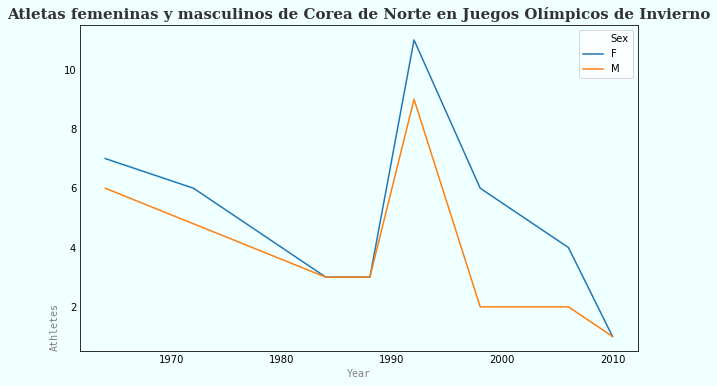

In [25]:
country_data = hola.query("Country == 'North Korea'").groupby(['Year'])['Sex'].value_counts().rename("Athletes").reset_index() #Colocar País en Country
country_data

fig, ax = plt.subplots(1,1, figsize=(10,6), facecolor='azure')
ax.set_facecolor('azure')
ax.set_axisbelow(True)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("Atletas",fontfamily='monospace',loc='bottom',color='gray')
ax.set_xlabel("Años",fontfamily='monospace',loc='center',color='gray')

#Cambiar nombre del país en el título del gráfico
ax.set_title('Atletas femeninas y masculinos de Corea de Norte en Juegos Olímpicos de Invierno', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')

#plt.axvline(1998, color='r')
sns.lineplot(data = country_data,x = 'Year',y = 'Athletes',hue = 'Sex')

Gráfica de las medallas ganadas por género de los países anfitriones. Esto es de las últimas 5 ediciones e histórica.

findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans.


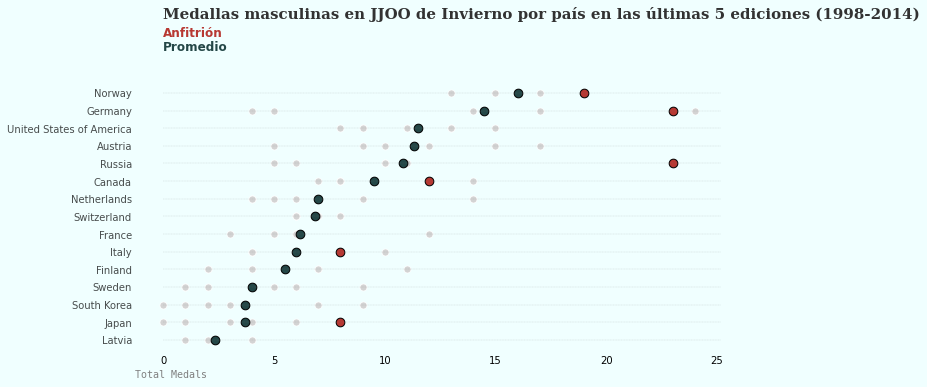

In [26]:
fig, ax = plt.subplots(1,1, figsize=(11, 5), facecolor='azure')

# top 20
#Cambiar "M" por "F" para mostrar las medallas ganadas por mujeres en TODOS los ítems
top_list_ = df_new_medal.groupby('Country')['M'].mean().sort_values(ascending=False).reset_index()[:15].sort_values(by='M',ascending=True)
top_list_.head(15)

plot = 1
for country in top_list_['Country']:
    #Cambiar "M" por "F" para mostrar las medallas ganadas por mujeres en TODOS los ítems
    mean = df_new_medal[df_new_medal['Country'] == country].groupby('Country')['M'].mean()
    # historic scores
    sns.scatterplot(data=df_new_medal[df_new_medal['Country'] == country], y=plot, x='M',color='lightgray',s=50,ax=ax)
    # mean score
    sns.scatterplot(data=df_new_medal[df_new_medal['Country'] == country], y=plot, x=mean,color='#244747',ec='black',linewidth=1,s=75,ax=ax)
    # Hosting score
    sns.scatterplot(data=(df_new_medal[(df_new_medal['Country'] == country) & (df_new_medal['Is_Host'] == 1)]), y=plot, x='M',color='#B73832',ec='black',linewidth=1,s=75,ax=ax)   
    plot += 1

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['Country'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Total Medals",fontfamily='monospace',loc='left',color='gray')
ax.set_facecolor('azure')
ax.hlines(y=top_list_.index+1, xmin=0, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)

#Cambiar género en el título del gráfico
ax.text(0,Yend+3.5, 'Medallas masculinas en JJOO de Invierno por país en las últimas 5 ediciones (1998-2014)', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(0,Yend+2.5, 'Anfitrión', fontsize=12,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(0,Yend+1.7, 'Promedio', fontsize=12,fontweight='bold',fontfamily='sansserif',color='#244747')


plt.show()

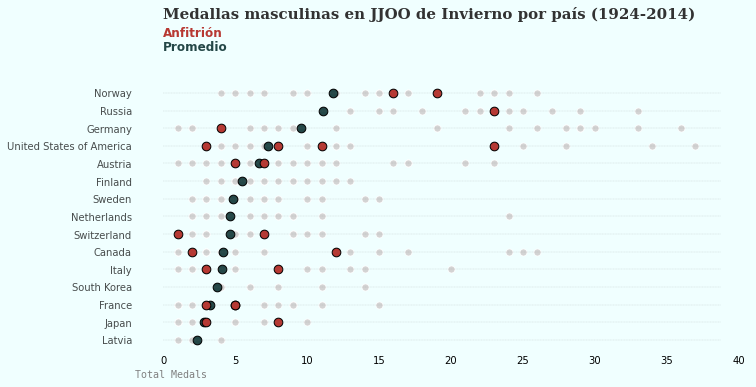

In [27]:
fig, ax = plt.subplots(1,1, figsize=(11, 5), facecolor='azure')

# top 20
#Cambiar "M" por "F" para mostrar las medallas ganadas por mujeres en TODOS los ítems
top_list_ = df_new.groupby('Country')['M'].mean().sort_values(ascending=False).reset_index()[:15].sort_values(by='M',ascending=True)
top_list_.head(15)


plot = 1
for country in top_list_['Country']:
    #Cambiar "M" por "F" para mostrar las medallas ganadas por mujeres en TODOS los ítems
    mean = df_new[df_new['Country'] == country].groupby('Country')['M'].mean()
    # historic scores
    sns.scatterplot(data=df_new[df_new['Country'] == country], y=plot, x='Total',color='lightgray',s=50,ax=ax)
    # mean score
    sns.scatterplot(data=df_new[df_new['Country'] == country], y=plot, x=mean,color='#244747',ec='black',linewidth=1,s=75,ax=ax)
    # Hosting score
    sns.scatterplot(data=(df_new[(df_new['Country'] == country) & (df_new['Is_Host'] == 1)]), y=plot, x='M',color='#B73832',ec='black',linewidth=1,s=75,ax=ax)   
    plot += 1

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['Country'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Total Medals",fontfamily='monospace',loc='left',color='gray')
ax.set_facecolor('azure')
ax.hlines(y=top_list_.index+1, xmin=0, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)

#Cambiar género en el título del gráfico
ax.text(0,Yend+3.5, 'Medallas masculinas en JJOO de Invierno por país (1924-2014)', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(0,Yend+2.5, 'Anfitrión', fontsize=12,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(0,Yend+1.7, 'Promedio', fontsize=12,fontweight='bold',fontfamily='sansserif',color='#244747')


plt.show()